In [2]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [4]:
stock = "AAPL"

In [5]:
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

In [6]:
df = yf.download(stock, start, end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-21,23.747499,23.750000,23.430000,23.485001,20.773306,156316000
2014-07-22,23.670000,23.722500,23.530001,23.680000,20.945799,220788000
2014-07-23,23.855000,24.469999,23.792500,24.297501,21.491999,371672000
2014-07-24,24.260000,24.330000,24.105000,24.257500,21.456612,182916000
2014-07-25,24.212500,24.459999,24.160000,24.417500,21.598137,173876000
...,...,...,...,...,...,...
2024-07-12,228.919998,232.639999,228.679993,230.539993,230.539993,53008200
2024-07-15,236.479996,237.229996,233.089996,234.399994,234.399994,62631300
2024-07-16,235.000000,236.270004,232.330002,234.820007,234.820007,43234300


<Axes: xlabel='Date', ylabel='Close'>

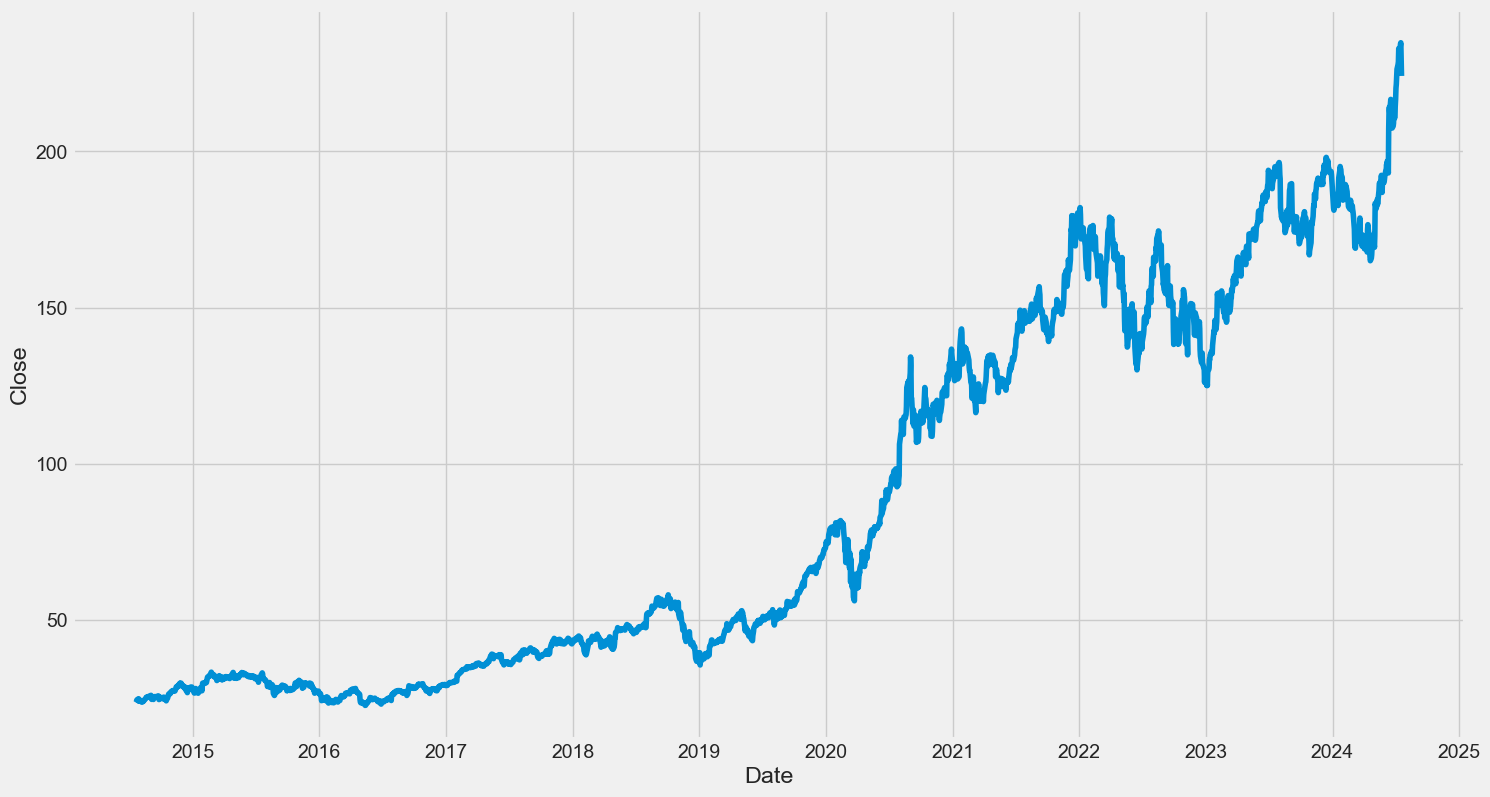

In [7]:
plt.figure(figsize=(16,9))
sns.lineplot(x="Date", y="Close", data=df)

In [8]:
data = df.filter(['Close'])
data

,Close
Date,
2014-07-21,23.485001
2014-07-22,23.680000
2014-07-23,24.297501
2014-07-24,24.257500
2014-07-25,24.417500
...,...
2024-07-12,230.539993
2024-07-15,234.399994
2024-07-16,234.820007


In [9]:
# # replace Close with the count of days
# data["Close"] = range(1, len(data) + 1)
# data

In [10]:
dataset = data.values
dataset

array([[ 23.48500061],
       [ 23.68000031],
       [ 24.29750061],
       ...,
       [234.82000732],
       [228.88000488],
       [224.17999268]])

In [11]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, max(scaled_data), min(scaled_data)

(array([[0.00424059],
        [0.00515938],
        [0.00806889],
        ...,
        [1.        ],
        [0.97201215],
        [0.94986683]]),
 array([1.]),
 array([0.]))

In [12]:
# train_data = scaled_data[0:int(training_data_len), :]
# test_data = scaled_data[training_data_len - 60:, :]

# train_data

NameError: name 'training_data_len' is not defined

In [ ]:
# len(train_data), len(test_data)

(0, 60)

In [ ]:
# How many days to look back
days = 60

x = []
y = []

# Create two arrays, x_train and y_train
# x_train contain arrays of 60 days of data
# y_train contain the 61st day data
for i in range(days, len(scaled_data)):
    x.append(scaled_data[i-days:i, 0])
    y.append(scaled_data[i, 0])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42, shuffle=False)


# x_train
# y_train
# x_train[-1], y_train[-2]

In [ ]:
x_test[1], y_test[0]

(array([0.67993024, 0.68619689, 0.69595019, 0.69821189, 0.7132895 ,
        0.73025185, 0.72591697, 0.73807332, 0.75027683, 0.75531837,
        0.75305675, 0.77185661, 0.76431784, 0.77675688, 0.77944255,
        0.78745259, 0.78735834, 0.79565101, 0.79183449, 0.79499136,
        0.78867762, 0.78782947, 0.79070365, 0.78585054, 0.78858337,
        0.79466158, 0.78613323, 0.80493318, 0.79975028, 0.8089382 ,
        0.81572314, 0.80380233, 0.81101138, 0.8263246 , 0.82703133,
        0.82448701, 0.81657122, 0.82151858, 0.81157677, 0.81086996,
        0.80578133, 0.80318985, 0.80366098, 0.80568707, 0.80073971,
        0.7682757 , 0.76172636, 0.75070087, 0.74726123, 0.76789875,
        0.76591982, 0.77086718, 0.7680401 , 0.76959499, 0.7588051 ,
        0.75432887, 0.78236389, 0.7961693 , 0.80714771, 0.81322584]),
 0.8132258434779096)

In [ ]:
x_test[-1], y_test[-1]

(array([0.67498288, 0.67997733, 0.68996631, 0.69406552, 0.6912856 ,
        0.71107496, 0.6961387 , 0.6912856 , 0.70886043, 0.75762716,
        0.74975853, 0.75300958, 0.75461163, 0.76323416, 0.75607227,
        0.77129123, 0.77670972, 0.78749969, 0.78806507, 0.78820642,
        0.79371917, 0.79989163, 0.79305952, 0.77411831, 0.78872472,
        0.78877188, 0.79018535, 0.79489711, 0.79942043, 0.80780735,
        0.80931515, 0.81647697, 0.80992763, 0.82128298, 0.80351963,
        0.86962559, 0.89751926, 0.90303201, 0.89478644, 0.91448155,
        0.90326754, 0.88154633, 0.87122764, 0.87429026, 0.87867223,
        0.89836735, 0.90237237, 0.8859754 , 0.9148585 , 0.93144391,
        0.93747495, 0.96004424, 0.96701769, 0.97106974, 0.99133031,
        0.96583975, 0.97983361, 0.998021  , 1.        , 0.97201215]),
 0.9498668257575196)

In [ ]:
x_test = np.array(x_test)
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
# LSTM expects the input to be 3D
# x_train.shape[0] is the number of samples
# x_train.shape[1] is the number of time steps
# 1 is the number of features

# The reason we need to reshape the data is because LSTM expects the input to be 3D
# In this case, 2332, 60, 1
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# x_train

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2334/2334 ━━━━━━━━━━━━━━━━━━━━ 34s 14ms/step - loss: 0.0022
Epoch 2/2
2334/2334 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - loss: 5.1660e-04


In [ ]:
# Get the models predicted price values 
predictions_scaled = model.predict(x_test)
predictions = scaler.inverse_transform(predictions_scaled)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions_scaled - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


0.11770677388882383

In [ ]:
a = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten().tolist()
b = scaler.inverse_transform(np.reshape(y_test,  (1, len(y_test))))[0].tolist()
pred = scaler.inverse_transform(predictions_scaled).flatten().tolist()
# pred

In [ ]:
rmse = np.sqrt(np.mean(((predictions - b) ** 2)))
rmse

24.98149882547235

In [ ]:
new_table = {'Date': data.iloc[60:, :].index.values,
             'Values': a + b,
             'Prediction': a + pred,
             }

df2 = pd.DataFrame(new_table)

In [ ]:
df2["Date"] = pd.to_datetime(df2["Date"])
df3 = df2.set_index('Date').copy(deep=True)
df3

,Values,Prediction
Date,,
2014-10-13,24.952499,24.952499
2014-10-14,24.687500,24.687500
2014-10-15,24.385000,24.385000
2014-10-16,24.065001,24.065001
2014-10-17,24.417500,24.417500
...,...,...
2024-07-12,230.539993,226.667160
2024-07-15,234.399994,226.589005
2024-07-16,234.820007,228.047134


In [ ]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df3.tail(200)[['Values', 'Prediction']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

NameError: name 'plt' is not defined